## Read in Data:

In [1]:
import numpy as np 
import pandas as pd
import re
from IPython.display import display, HTML

In [2]:
train_all = pd.read_csv("train_df_more_variables.csv")   #this one had NAs
train_all = pd.read_csv("train_more_variables_notempNAs_noStore35.csv")   #this one doesn't
del train_all["Unnamed: 0"]

In [3]:
#all useful columns (some have NAs):
train_useful = train_all[['units', 'store_nbr', 'item_nbr', 'Before3', 'Before2', 'Before1',
       'any_event', 'After1', 'After2', 'After3', 'sales_3_10_days_before',
       'month', 'is_weekend', 'is_winter', 'leapday', 'before_Valentines',
       'before_4July', 'is_holiday', 'tmax', 'tmin', 'tavg', 'dewpoint',
       'heat', 'resultspeed', 'resultdir', 'avgspeed', 'rain_numeric',
       'before_Xmas', 'before_Memorial', 'before_NewYears', 'BlackFriday',
       'before_Thanksgiving', 'before_Easter', 'before_Halloween']]


In [107]:
#columns with no NAs:
train_useful =train_all[["units", "store_nbr", "item_nbr","Before3","Before2", "Before1", "any_event", 
                         "After1", "After2", "After3", "month", "tmin", "tavg", "tmax", "is_weekend",
                         "is_winter" , "leapday", "before_Valentines" , "before_4July" ,
                         "is_holiday", "before_Xmas", "before_Memorial" , "before_NewYears",  "BlackFriday" , "before_Thanksgiving",
                         "before_Easter" , "before_Halloween" ]]
#removed dewpoint, result speed & result dir, avg speed cuz wasn't very significant in the regressino model 

In [108]:
train_useful.head()

,units,store_nbr,item_nbr,Before3,Before2,Before1,any_event,After1,After2,After3,...,before_Valentines,before_4July,is_holiday,before_Xmas,before_Memorial,before_NewYears,BlackFriday,before_Thanksgiving,before_Easter,before_Halloween
0,29,1,9,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,1,28,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,1,51,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,191,2,5,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,215,2,44,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## One Hot Encoding:

In [109]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc.fit(train_useful["store_nbr"].values.reshape(-1,1))
store_encoded = enc.transform(train_useful["store_nbr"].values.reshape(-1,1)).toarray()

enc.fit(train_useful["item_nbr"].values.reshape(-1,1))
item_encoded = enc.transform(train_useful["item_nbr"].values.reshape(-1,1)).toarray()

In [110]:
train_useful = np.concatenate((train_useful, store_encoded),axis =1)
train_useful = np.concatenate((train_useful, item_encoded),axis =1)
train_useful = pd.DataFrame(train_useful)

In [111]:
store_names = []
for i in range(1,35):   #don't include store 35 because its weather data was missing
    store_names.append("store" + str(i))
for i in range(36,46):
    store_names.append("store" + str(i))
    
item_names = []  #don't include items 24, 63, 66 because those were only purchased at store 35 
for i in range(1,24):
    item_names.append("item" + str(i))
for i in range(25,63):
    item_names.append("item" + str(i))
for i in range(64,66):
    item_names.append("item" + str(i))
for i in range(67,112):
    item_names.append("item" + str(i))

In [112]:
all_columns = ["units", "store_nbr", "item_nbr","Before3","Before2", "Before1", "any_event", 
                         "After1", "After2", "After3", "month", "tmin", "tavg", "tmax","is_weekend",
                         "is_winter" , "leapday", "before_Valentines" , "before_4July" ,
                         "is_holiday", "before_Xmas", "before_Memorial" , "before_NewYears",  "BlackFriday" , "before_Thanksgiving",
                         "before_Easter" , "before_Halloween" ]
all_columns  = all_columns + store_names + item_names

train_useful.columns = all_columns

In [113]:
train_useful.head()

,units,store_nbr,item_nbr,Before3,Before2,Before1,any_event,After1,After2,After3,...,item102,item103,item104,item105,item106,item107,item108,item109,item110,item111
0,29.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,191.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215.0,2.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
del train_useful["store_nbr"]
del train_useful["item_nbr"]

Turn the dataframe to a matrix:

In [115]:
mat_train = train_useful.as_matrix()
X_train_all = mat_train[:,1:]
y_train_all = mat_train[:, 0]

print(X_train_all.shape)
print(y_train_all.shape)

(116100, 176)
(116100,)


### Random Forest Model

In [13]:
# test/train split:   
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all)    

Run random forest by 10-fold cross validation and print the r^2 values.

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=20 ,oob_score = True)
rf.fit(X_train, y_train)
scores = cross_val_score(rf, X_train_all, y_train_all, cv=5, scoring = "neg_mean_squared_error")

In [124]:
print(np.sqrt(scores*-1))
print(np.mean(np.sqrt(scores*-1)))

[ 26.99124007  43.99602673  22.68725834  32.16791413  24.34931797]
30.0383514497


In [20]:
scores_r2 = cross_val_score(rf, X_train_all, y_train_all, cv=5, scoring = "r2")
print(scores_r2)

[ 0.70602233  0.47629983  0.75796505  0.5770556   0.56052514]


In [21]:
np.mean(scores_r2)

0.61557359227885367

In [146]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_mse.mean(), scores_mse.std() * 2))

Accuracy: 0.49 (+/- 0.30)


In [142]:
y_pred = rf.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

30.722513124063145

In [144]:
y_test

array([ 48.,  54.,  16., ...,   3.,   2.,   2.])

In [108]:
predictions

array([ 40.16833476,  78.62168103,  56.6875    , ...,  86.04883416,
        58.71875624,  78.22743302])

### Feature Importance Plots

In [150]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

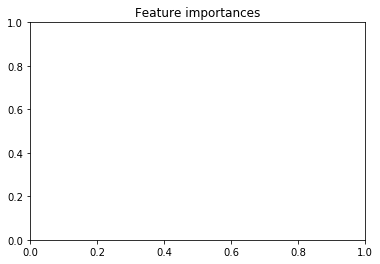

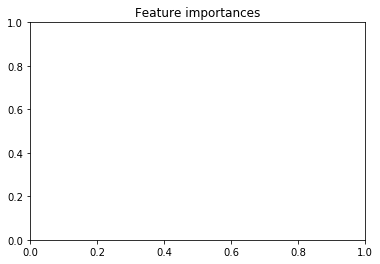

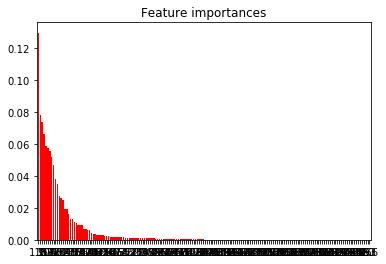

In [152]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_all.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train_all.shape[1]), indices)
plt.xlim([-1, X_train_all.shape[1]])
plt.show()

In [154]:
print("Feature ranking:")

for f in range(X_train_all.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 110 (0.129545)
2. feature 9 (0.078233)
3. feature 8 (0.073667)
4. feature 10 (0.066038)
5. feature 111 (0.058443)
6. feature 59 (0.057414)
7. feature 7 (0.055525)
8. feature 76 (0.051735)
9. feature 72 (0.046753)
10. feature 56 (0.037796)
11. feature 40 (0.034981)
12. feature 91 (0.027135)
13. feature 114 (0.026203)
14. feature 12 (0.024726)
15. feature 39 (0.019231)
16. feature 11 (0.019077)
17. feature 27 (0.016154)
18. feature 48 (0.013236)
19. feature 37 (0.012842)
20. feature 36 (0.011238)
21. feature 53 (0.010439)
22. feature 83 (0.009447)
23. feature 25 (0.009434)
24. feature 132 (0.009301)
25. feature 102 (0.006860)
26. feature 47 (0.006484)
27. feature 60 (0.006373)
28. feature 103 (0.005924)
29. feature 38 (0.004108)
30. feature 41 (0.003938)
31. feature 46 (0.003726)
32. feature 30 (0.003199)
33. feature 57 (0.002921)
34. feature 135 (0.002899)
35. feature 43 (0.002847)
36. feature 61 (0.002628)
37. feature 126 (0.002179)
38. feature 14 (0.002147)

## Random Forest on individual store/product pairs

item 45, store 15 has 1011 rows

In [3]:
single = pd.read_csv("store15_item45.csv")   
del single["Unnamed: 0"]

In [4]:
#columns with no NAs:
single_useful =single[["units", "store_nbr", "item_nbr","Before3","Before2", "Before1", "any_event", 
                         "After1", "After2", "After3", "month", "tmin", "tavg", "tmax", "is_weekend",
                         "is_winter" , "leapday", "before_Valentines" , "before_4July" ,
                         "is_holiday", "before_Xmas", "before_Memorial" , "before_NewYears",  "BlackFriday" , "before_Thanksgiving",
                         "before_Easter" , "before_Halloween" ]]
#removed dewpoint, result speed & result dir, avg speed cuz wasn't very significant in the regressino model 

In [5]:
mat_train_single = single_useful.as_matrix()
X_train_all_single = mat_train_single [:,1:]
y_train_all_single = mat_train_single [:, 0]

print(X_train_all_single.shape)
print(y_train_all_single.shape)

(1011, 26)
(1011,)


In [61]:
# test/train split:   
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_train_all_single, y_train_all_single)    

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(min_samples_split=5, max_features = 5, n_estimators = 25)
#rf.fit(X_train, y_train)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")

In [103]:
print("all mse's:",  np.sqrt(scores*-1))
print("mean mse:", np.mean(np.sqrt(scores*-1)))

all mse's: [ 32.35526648  24.09234064  27.76544735  29.721169    30.60749869
  26.43324084  36.2413407   27.70080731  25.33278367  28.01017957]
mean mse: 28.8260074266


In [85]:
rf.fit( X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)**0.5


27.987834119874595

In [56]:
scores = cross_val_score(rf, X_train_all_single, y_train_all_single, cv=10, scoring = "r2")

In [57]:
print("all r2's:",  scores)
print("mean r2:", np.mean(scores))

all r2's: [-0.13324797 -0.3183643  -0.2466361  -0.07035961  0.26098712 -0.39389686
  0.01651411 -2.24220366 -5.29179971 -5.16228907]
mean r2: -1.35812960726


In [105]:
rf.fit( X_train_all_single, y_train_all_single)
rf.predict(X_train_all_single)

array([ 112.46866667,   93.57927273,  101.0722381 , ...,   63.26439394,
         49.92052381,   55.68295238])

In [106]:
rf.score(X_train_all_single, y_train_all_single)

0.74388162295586668